In [1]:
import pandas as pd

# 두 데이터프레임 불러오기
df1 = pd.read_csv('소화기.csv', encoding='cp949')  # 첫 번째 데이터: 소화기 수량
df2 = pd.read_csv('마스크.csv', encoding='cp949')  # 두 번째 데이터: 마스크 수량

# 역명 전처리 - '역' 글자 제거
# df2['역명'] = df2['역명'].str.replace('역$', '', regex=True).str.strip()
# df1['역명'] = df1['역명'].str.strip()

# 병합
merged = pd.merge(df1, df2, on='역명', how='outer')


# 결과 확인
merged

,역명,소화기_수량,화재용 긴급대피마스크_수량
0,신내,12.0,NaN
1,장암,13.0,NaN
2,지축,19.0,NaN
3,구산,20.0,150.0
4,창신,21.0,250.0
...,...,...,...
234,종로3가,144.0,800.0
235,잠실,145.0,600.0
236,방화,NaN,150.0
237,개화산,NaN,150.0


In [2]:
station_df = pd.read_csv("서울교통공사_역사건축정보_20250310.csv", encoding="cp949")

# 3. 역명 기준으로 면적 합산
station_area_sum = station_df.groupby('역명', as_index=False)['면적'].sum()

In [3]:
import pandas as pd

# 1. 소화기 & 마스크 수량 데이터 입력 (예시 — 실제로는 CSV에서 불러오면 됨)
fire_data = merged

merged = pd.merge(fire_data, station_area_sum, on='역명', how='left')

# 4. 밀도 계산
merged['소화기_밀도(개/㎡)'] = merged['소화기_수량'] / merged['면적']
merged['마스크_밀도(개/㎡)'] = merged['화재용 긴급대피마스크_수량'] / merged['면적']

# 5. 결과 정렬 및 출력
merged = merged.dropna()
merged

,역명,소화기_수량,화재용 긴급대피마스크_수량,면적,소화기_밀도(개/㎡),마스크_밀도(개/㎡)
3,구산,20.0,150.0,4844.770,0.004128,0.030961
4,창신,21.0,250.0,7085.160,0.002964,0.035285
5,개롱,22.0,150.0,6440.220,0.003416,0.023291
6,독바위,23.0,150.0,5530.700,0.004159,0.027121
8,상도,25.0,200.0,8419.020,0.002969,0.023756
...,...,...,...,...,...,...
231,사당,127.0,480.0,23643.000,0.005372,0.020302
232,시청,130.0,450.0,23878.000,0.005444,0.018846
233,동대문역사문화공원,135.0,892.0,30365.460,0.004446,0.029375
234,종로3가,144.0,800.0,33328.904,0.004321,0.024003


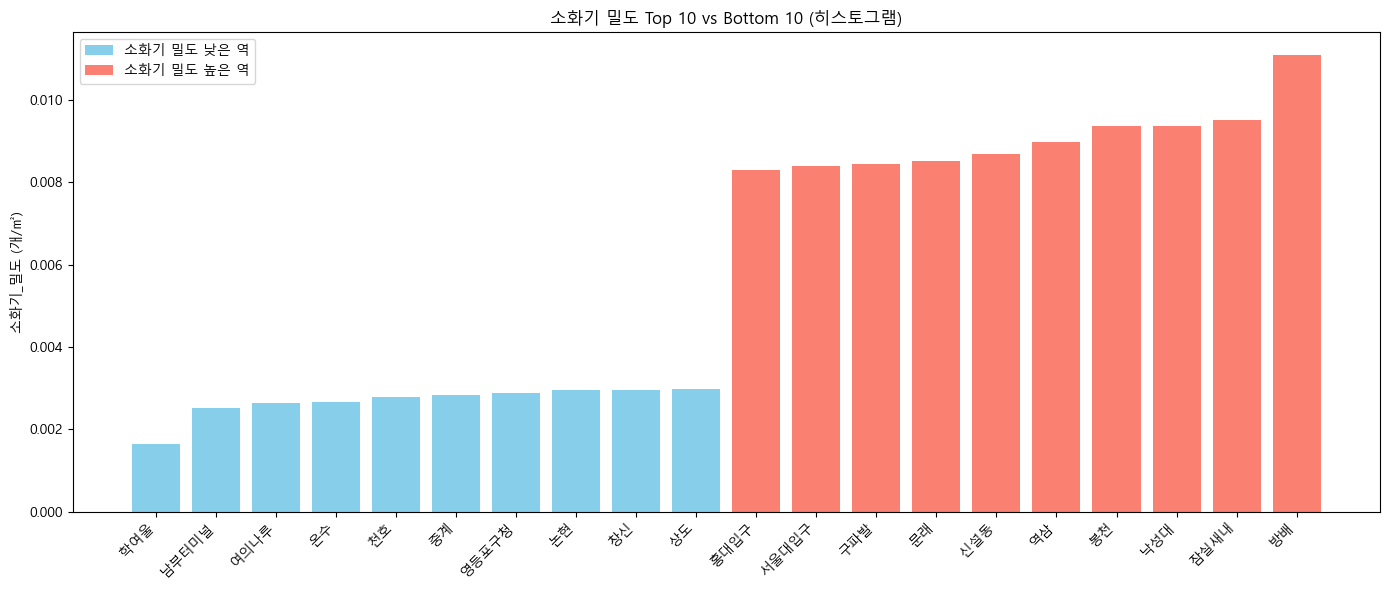

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 깨짐 방지 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 소화기 밀도 하위 10개 + 상위 10개 역 추출
bottom_fire = merged.nsmallest(10, '소화기_밀도(개/㎡)')
top_fire = merged.nlargest(10, '소화기_밀도(개/㎡)').sort_values('소화기_밀도(개/㎡)')

# 2. 시각화
plt.figure(figsize=(14, 6))

# 하위 10개 막대 (파란색)
plt.bar(bottom_fire['역명'], bottom_fire['소화기_밀도(개/㎡)'], color='skyblue', label='소화기 밀도 낮은 역')

# 상위 10개 막대 (빨간색)
plt.bar(top_fire['역명'], top_fire['소화기_밀도(개/㎡)'], color='salmon', label='소화기 밀도 높은 역')

# 꾸미기
plt.xticks(rotation=45, ha='right')
plt.ylabel('소화기_밀도 (개/㎡)')
plt.title('소화기 밀도 Top 10 vs Bottom 10 (히스토그램)')
plt.legend()
plt.tight_layout()
plt.show()


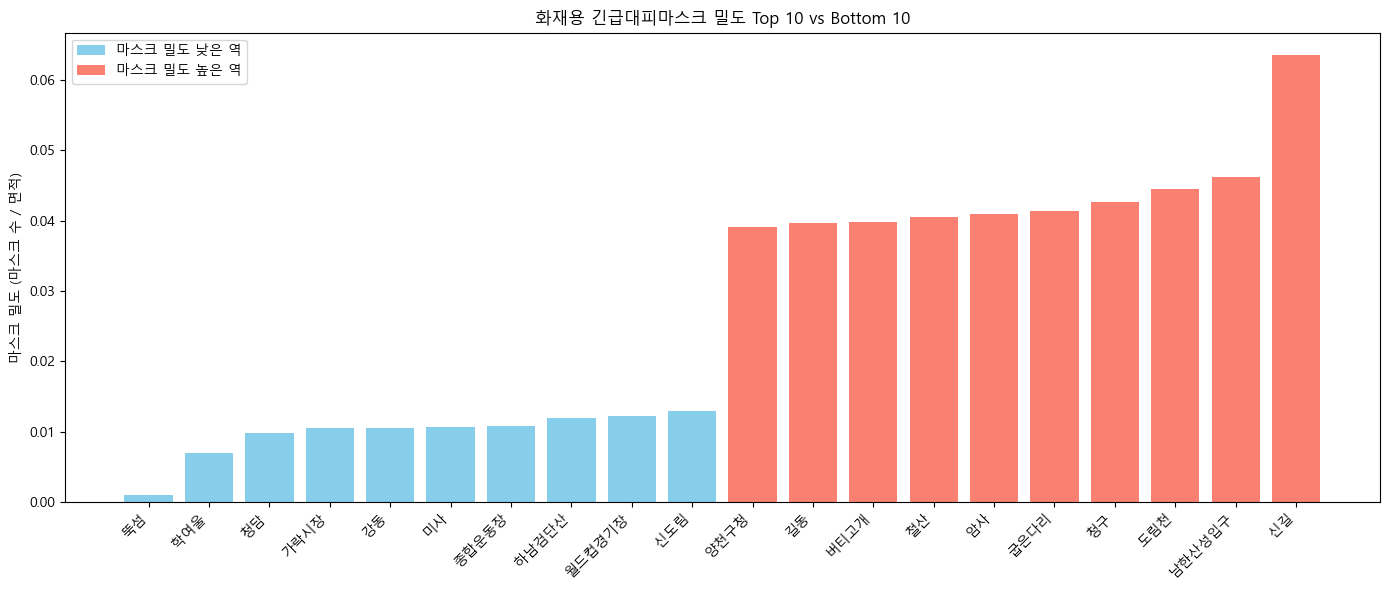

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 상위 10개, 하위 10개 마스크 밀도 역 추출
bottom_mask = merged.nsmallest(10, '마스크_밀도(개/㎡)')
top_mask = merged.nlargest(10, '마스크_밀도(개/㎡)').sort_values('마스크_밀도(개/㎡)')

# 2. 그래프 시각화
plt.figure(figsize=(14, 6))

# 하위 10개 히스토그램 (파란색)
plt.bar(bottom_mask['역명'], bottom_mask['마스크_밀도(개/㎡)'], color='skyblue', label='마스크 밀도 낮은 역')

# 상위 10개 히스토그램 (빨간색)
plt.bar(top_mask['역명'], top_mask['마스크_밀도(개/㎡)'], color='salmon', label='마스크 밀도 높은 역')

plt.xticks(rotation=45, ha='right')
plt.ylabel('마스크 밀도 (마스크 수 / 면적)')
plt.title('화재용 긴급대피마스크 밀도 Top 10 vs Bottom 10')
plt.legend()
plt.tight_layout()
plt.show()
